In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
soubor = pd.read_csv('C:/Users/zbyne/Documents/kurzy analyzy/kurzykanalyze.csv')

In [2]:

sloupce = list(soubor[37:1])
data = soubor[[
 'name',
 'match_api_id',
 'home_team',
 'home_team_goal',
 'away_team_goal',
 'season',
 'name:1',
 'BWH',
 'LBH',
 'PSH',
 'WHH',
 'VCH',
 'BWD',
 'IWD',
 'LBD',
 'PSD',
 'WHD',
 'VCD',
 'BWA',
 'IWA',
 'LBA',
 'PSA',
 'WHA',
 'VCA',
 'B365A',
 'B365D',
 'B365H',
 'vyhodny_kurs',
 'team_long_name'
 ]]
data
data = data.rename(columns={'name':'League','name:1':'Country','team_long_name':'away_team','vyhodny_kurs':'Vyhra nebo Prohra?'})
data.head(n=5)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9501 entries, 0 to 9500
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   League              9501 non-null   object 
 1   match_api_id        9501 non-null   int64  
 2   home_team           9501 non-null   object 
 3   home_team_goal      9501 non-null   int64  
 4   away_team_goal      9501 non-null   int64  
 5   season              9501 non-null   object 
 6   Country             9501 non-null   object 
 7   BWH                 9488 non-null   float64
 8   LBH                 9484 non-null   float64
 9   PSH                 4743 non-null   float64
 10  WHH                 9490 non-null   float64
 11  VCH                 9484 non-null   float64
 12  BWD                 9488 non-null   float64
 13  IWD                 9457 non-null   float64
 14  LBD                 9484 non-null   float64
 15  PSD                 4743 non-null   float64
 16  WHD   

In [3]:
print(data.groupby('League').groups)

{'Belgium Jupiler League': Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            656, 657, 658, 659, 660, 661, 662, 663, 664, 665],
           dtype='int64', length=666), 'England Premier League': Int64Index([ 666,  667,  668,  669,  670,  671,  672,  673,  674,  675,
            ...
            1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910],
           dtype='int64', length=1245), 'France Ligue 1': Int64Index([1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920,
            ...
            3395, 3396, 3397, 3398, 3399, 3400, 3401, 3402, 3403, 3404],
           dtype='int64', length=1494), 'Germany 1. Bundesliga': Int64Index([3405, 3406, 3407, 3408, 3409, 3410, 3411, 3412, 3413, 3414,
            ...
            4451, 4452, 4453, 4454, 4455, 4456, 4457, 4458, 4459, 4460],
           dtype='int64', length=1056), 'Italy Serie A': Int64Index([4461, 4462, 4463, 4464, 4465, 4466, 4467, 4468, 4469, 4470,
            ...
            5766

In [4]:
#rozdeleni do jednotlivych lig resp. zemí
belgicka_liga = data[0:666]
anglicka_liga = data[666:1911]
francouzska_liga = data[1911:3405]
bundesliga = data[3405:4461]
italska_liga = data[4461:5776]
nizozemska_liga = data[5776:6528]
portugalska_liga = data[6528:7391]
skotska_liga = data[7391:8280]
spanelska_liga = data[8280:9501]
belgicka_liga

,League,match_api_id,home_team,home_team_goal,away_team_goal,season,Country,BWH,LBH,PSH,...,IWA,LBA,PSA,WHA,VCA,B365A,B365D,B365H,Vyhra nebo Prohra?,away_team
0,Belgium Jupiler League,492475,KSV Cercle Brugge,0,3,2008/2009,Belgium,2.40,2.50,NaN,...,2.30,2.50,NaN,2.40,2.65,2.75,3.30,2.38,ANO,RSC Anderlecht
1,Belgium Jupiler League,492479,KSV Roeselare,2,2,2008/2009,Belgium,2.05,1.83,NaN,...,3.50,3.60,NaN,3.60,3.00,3.30,3.20,2.10,NE,KV Kortrijk
2,Belgium Jupiler League,492480,Tubize,1,2,2008/2009,Belgium,2.55,2.50,NaN,...,2.40,2.50,NaN,2.25,2.25,2.20,3.40,3.20,ANO,Royal Excel Mouscron
3,Belgium Jupiler League,492481,KVC Westerlo,1,0,2008/2009,Belgium,2.30,2.25,NaN,...,3.00,2.75,NaN,2.75,2.80,2.88,3.25,2.25,ANO,Sporting Charleroi
4,Belgium Jupiler League,492566,SV Zulte-Waregem,0,2,2008/2009,Belgium,2.60,2.50,NaN,...,2.40,2.50,NaN,2.40,2.30,2.50,3.20,2.60,ANO,KAA Gent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
661,Belgium Jupiler League,1979886,Oud-Heverlee Leuven,2,3,2015/2016,Belgium,2.65,2.60,2.64,...,2.50,2.62,2.76,2.45,2.63,2.60,3.30,2.63,ANO,SV Zulte-Waregem
662,Belgium Jupiler League,1979887,KVC Westerlo,0,3,2015/2016,Belgium,2.55,2.45,2.51,...,2.55,2.88,2.92,2.70,2.80,3.00,3.10,2.45,ANO,Sint-Truidense VV
663,Belgium Jupiler League,1979890,KV Mechelen,0,1,2015/2016,Belgium,2.15,2.15,2.22,...,3.10,3.25,3.45,3.10,3.30,3.20,3.40,2.20,ANO,Sporting Charleroi
664,Belgium Jupiler League,1979892,Royal Excel Mouscron,2,2,2015/2016,Belgium,3.00,3.20,3.29,...,2.20,2.20,2.27,2.15,2.20,2.25,3.40,3.10,NE,KV Oostende


In [5]:
pozitivni = len(data[data['Vyhra nebo Prohra?']=='ANO'])
negativni = len(data) - pozitivni
print(pozitivni, 'dopadlo neremízou', negativni, 'dopadlo remízou')

6685 dopadlo neremízou 2816 dopadlo remízou


In [6]:
list_lig = [belgicka_liga,
anglicka_liga,
francouzska_liga,
bundesliga,
italska_liga,
nizozemska_liga,
portugalska_liga,
skotska_liga,
spanelska_liga]

list_nazvu_lig = ['belgicka_liga',
'anglicka_liga',
'francouzska_liga',
'bundesliga',
'italska_liga',
'nizozemska_liga',
'portugalska_liga',
'skotska_liga',
'spanelska_liga']

In [7]:
list_pomeru = []
for liga in list_lig:
    p = len(liga[liga['Vyhra nebo Prohra?']=='ANO'])
    n = len(liga) - p 
    pomer_p = (p/len(liga)*100)
    pomer_p
    list_pomeru.append(pomer_p)

print(zip(list_nazvu_lig,list_pomeru))

In [8]:
print(dict(zip(list_nazvu_lig,list_pomeru)))

{'belgicka_liga': 72.07207207207207, 'anglicka_liga': 68.99598393574297, 'francouzska_liga': 69.61178045515395, 'bundesliga': 72.25378787878788, 'italska_liga': 69.58174904942965, 'nizozemska_liga': 72.3404255319149, 'portugalska_liga': 67.78679026651217, 'skotska_liga': 70.4161979752531, 'spanelska_liga': 71.49877149877149}


In [9]:
soucet = 0
for num in list_pomeru:
    soucet = soucet + num
print(soucet/len(list_pomeru))

70.5063954070709


In [10]:
len(data[data['Vyhra nebo Prohra?']=='ANO'])

6685

(array([1., 0., 1., 1., 1., 1., 0., 0., 1., 3.]),
 array([67.78679027, 68.24215379, 68.69751732, 69.15288085, 69.60824437,
        70.0636079 , 70.51897143, 70.97433495, 71.42969848, 71.88506201,
        72.34042553]),
 <a list of 10 Patch objects>)

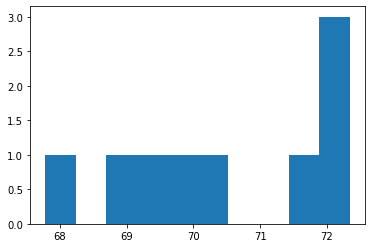

In [11]:
plt.hist(list_pomeru)

In [12]:
data.describe()

,match_api_id,home_team_goal,away_team_goal,BWH,LBH,PSH,WHH,VCH,BWD,IWD,...,VCD,BWA,IWA,LBA,PSA,WHA,VCA,B365A,B365D,B365H
count,9.501000e+03,9501.000000,9501.000000,9488.000000,9484.000000,4743.000000,9490.000000,9484.000000,9488.000000,9457.000000,...,9484.000000,9488.000000,9457.000000,9484.000000,4743.000000,9490.000000,9484.000000,9501.000000,9501.000000,9501.000000
mean,1.198751e+06,1.308178,1.222398,2.528331,2.495137,2.672374,2.541582,2.593432,3.210183,3.177197,...,3.286532,2.844790,2.798395,2.827347,3.013348,2.854933,2.946588,2.916190,3.259597,2.570469
std,5.009556e+05,1.119288,1.119449,0.424720,0.411564,0.488748,0.410659,0.456837,0.164948,0.136857,...,0.188684,0.482544,0.448538,0.476538,0.549005,0.471597,0.522193,0.510594,0.171146,0.439327
min,4.831290e+05,0.000000,0.000000,1.750000,1.800000,1.960000,1.800000,1.850000,1.650000,1.500000,...,1.620000,1.800000,1.750000,1.730000,2.000000,1.830000,1.850000,2.050000,1.400000,2.050000
25%,7.053590e+05,0.000000,0.000000,2.200000,2.200000,2.280000,2.250000,2.250000,3.100000,3.100000,...,3.200000,2.450000,2.500000,2.450000,2.550000,2.500000,2.500000,2.500000,3.200000,2.200000
50%,1.216805e+06,1.000000,1.000000,2.400000,2.380000,2.540000,2.450000,2.500000,3.200000,3.200000,...,3.300000,2.850000,2.750000,2.800000,3.010000,2.800000,2.900000,2.900000,3.250000,2.400000
75%,1.709937e+06,2.000000,2.000000,2.750000,2.750000,2.990000,2.800000,2.880000,3.300000,3.300000,...,3.400000,3.200000,3.100000,3.200000,3.425000,3.200000,3.300000,3.300000,3.400000,2.880000
max,2.216669e+06,6.000000,7.000000,4.600000,4.330000,4.700000,5.000000,4.600000,4.400000,4.000000,...,4.100000,5.750000,6.000000,8.000000,4.520000,7.500000,5.250000,9.500000,4.000000,4.500000


(array([2.857e+03, 3.359e+03, 2.058e+03, 0.000e+00, 8.760e+02, 2.650e+02,
        0.000e+00, 6.800e+01, 1.500e+01, 3.000e+00]),
 array([0. , 0.7, 1.4, 2.1, 2.8, 3.5, 4.2, 4.9, 5.6, 6.3, 7. ]),
 <a list of 10 Patch objects>)

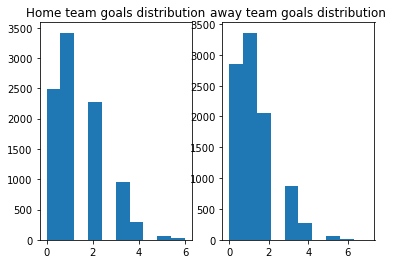

In [13]:
plt.subplot(121)
plt.title('Home team goals distribution')
plt.hist(data['home_team_goal'])
plt.subplot(122)
plt.title('away team goals distribution')
plt.hist(data['away_team_goal'])

In [14]:
data.shape

(9501, 29)

In [15]:
# a)vybrat sample se 100 vzorkama, kde jsou u všech kurzy
# b)70 dopadne dobře a 30 špatně
# b) jak určit p, výhry?


In [16]:
nizozemska_liga
vyhra_hostu = nizozemska_liga['away_team_goal'] > nizozemska_liga['home_team_goal']
vyhra_domacich = nizozemska_liga['away_team_goal'] < nizozemska_liga['home_team_goal']
nizozemska_liga['vyhra_hostu'] = vyhra_hostu
nizozemska_liga['vyhra_domacich'] = vyhra_domacich

<ipython-input-16-23c5a6b73db8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nizozemska_liga['vyhra_hostu'] = vyhra_hostu
<ipython-input-16-23c5a6b73db8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nizozemska_liga['vyhra_domacich'] = vyhra_domacich


In [17]:
nizozemska_liga
sloupce = list(nizozemska_liga[37:1])
sloupce
nizozemska_liga = nizozemska_liga[[
'Vyhra nebo Prohra?',
'home_team',
'away_team',
'home_team_goal',
'away_team_goal',
'season',
'B365A',
'B365D',
'B365H',
'vyhra_hostu',
'vyhra_domacich']]

In [18]:
nizozemska_liga

,Vyhra nebo Prohra?,home_team,away_team,home_team_goal,away_team_goal,season,B365A,B365D,B365H,vyhra_hostu,vyhra_domacich
5776,ANO,Vitesse,FC Groningen,0,4,2008/2009,3.00,3.3,2.20,True,False
5777,NE,Roda JC Kerkrade,FC Twente,1,1,2008/2009,2.70,3.3,2.38,False,False
5778,ANO,N.E.C.,PSV,1,0,2008/2009,2.10,3.4,3.40,False,True
5779,NE,Heracles Almelo,Vitesse,0,0,2008/2009,3.20,3.4,2.20,False,False
5780,ANO,Willem II,Roda JC Kerkrade,2,1,2008/2009,3.10,3.3,2.30,False,True
...,...,...,...,...,...,...,...,...,...,...,...
6523,ANO,Willem II,PEC Zwolle,0,1,2015/2016,3.20,3.6,2.10,True,False
6524,ANO,Excelsior,FC Utrecht,1,0,2015/2016,2.40,3.4,2.80,False,True
6525,ANO,AZ,FC Twente,3,1,2015/2016,3.30,3.6,2.05,False,True
6526,NE,SC Cambuur,AZ,1,1,2015/2016,2.25,3.5,3.00,False,False


In [24]:
vzorek = nizozemska_liga.sample(100)
vzorek2 = nizozemska_liga.sample(100)
vzorek3 = nizozemska_liga.sample(100)
vzorek

,Vyhra nebo Prohra?,home_team,away_team,home_team_goal,away_team_goal,season,B365A,B365D,B365H,vyhra_hostu,vyhra_domacich
6334,ANO,Excelsior,PEC Zwolle,0,5,2014/2015,2.50,3.5,2.63,True,False
6401,ANO,NAC Breda,FC Groningen,4,5,2014/2015,2.50,3.6,2.60,True,False
6164,NE,Willem II,ADO Den Haag,1,1,2012/2013,2.20,3.4,3.20,False,False
6392,ANO,FC Utrecht,FC Twente,1,0,2014/2015,2.45,3.5,2.70,False,True
5902,ANO,FC Groningen,SC Heerenveen,2,0,2009/2010,3.25,3.4,2.15,False,True
...,...,...,...,...,...,...,...,...,...,...,...
6194,ANO,Willem II,FC Groningen,1,2,2012/2013,2.38,3.4,2.88,True,False
6351,ANO,Go Ahead Eagles,ADO Den Haag,1,0,2014/2015,2.88,3.5,2.30,False,True
5925,ANO,N.E.C.,FC Groningen,0,2,2009/2010,2.75,3.3,2.50,True,False
5955,NE,AZ,PSV,1,1,2009/2010,3.60,3.3,2.05,False,False


In [85]:
budget = 5000
velikost_sazky = 100
vz = vzorek
vysledky = []
for i in range(0,100):
    if vz.iloc[i,9] == True:
        budget = budget + velikost_sazky*vz.iloc[i,6] - 2*velikost_sazky
        
    elif vzorek.iloc[i,10] == True:
        budget = budget + velikost_sazky*vz.iloc[i,8] - 2*velikost_sazky
        
    else:
        budget = budget - 2*velikost_sazky
        
vysledky.append(budget)
print(vysledky)

vz = vzorek2
budget = 5000
velikost_sazky = 100

for i in range(0,100):
    if vz.iloc[i,9] == True:
        budget = budget + velikost_sazky*vz.iloc[i,6] -2*velikost_sazky
        
    elif vzorek.iloc[i,10] == True:
        budget = budget + velikost_sazky*vz.iloc[i,8]-2*velikost_sazky
        
    else:
        budget = budget - 2*velikost_sazky
        
vysledky.append(budget)
print(vysledky)

vz = vzorek3
budget = 5000
velikost_sazky = 100

for i in range(0,100):
    if vz.iloc[i,9] == True:
        budget = budget + velikost_sazky*vz.iloc[i,6]-2*velikost_sazky
        
    elif vzorek.iloc[i,10] == True:
        budget = budget + velikost_sazky*vz.iloc[i,8]-2*velikost_sazky
        
    else:
        budget = budget - 2*velikost_sazky
        
vysledky.append(budget)
balanc = []
for budget in vysledky:
    budget = budget -5000
    balanc.append(budget)
print(balanc)

[3829.0]
[3829.0, 967.0]
[-1171.0, -4033.0, -2110.0]


In [51]:
vzorek.iloc[0,0]
vzorek.iloc[0,6]
vzorek.iloc[0,8]
vzorek.iloc[0,9]
vzorek.iloc[0,10]

False

In [83]:
budget = 5000
velikost_sazky = 100
vz = vzorek
vysledky = []
for i in range(0,100):
    if vz.iloc[i,9] == True:
        budget = budget + velikost_sazky*vz.iloc[i,6] - 2*velikost_sazky
        vysledky.append(budget)
    elif vzorek.iloc[i,10] == True:
        budget = budget + velikost_sazky*vz.iloc[i,8] - 2*velikost_sazky
        vysledky.append(budget)
    else:
        budget = budget - 2*velikost_sazky
        vysledky.append(budget)
print(vysledky)

[5050.0, 5100.0, 4900.0, 4970.0, 4985.0, 5025.0, 5035.0, 5075.0, 4875.0, 4675.0, 4695.0, 4705.0, 4775.0, 4805.0, 4855.0, 4955.0, 4975.0, 5005.0, 4805.0, 4945.0, 5010.0, 4810.0, 4850.0, 4930.0, 4970.0, 5032.0, 5072.0, 5222.0, 5277.0, 5407.0, 5497.0, 5547.0, 5577.0, 5627.0, 5690.0, 5490.0, 5615.0, 5725.0, 5775.0, 5575.0, 5375.0, 5175.0, 5237.0, 5247.0, 5317.0, 5117.0, 5122.0, 5127.0, 4927.0, 4967.0, 4767.0, 4822.0, 4862.0, 4877.0, 4917.0, 5042.0, 4842.0, 4862.0, 4962.0, 4762.0, 4767.0, 4567.0, 4697.0, 4497.0, 4297.0, 4437.0, 4237.0, 4287.0, 4302.0, 4102.0, 4122.0, 4147.0, 4247.0, 4267.0, 4287.0, 4087.0, 3887.0, 3687.0, 3762.0, 3792.0, 3592.0, 3642.0, 3680.0, 3718.0, 3518.0, 3318.0, 3368.0, 3393.0, 3431.0, 3531.0, 3541.0, 3581.0, 3691.0, 3771.0, 3881.0, 3919.0, 3949.0, 4024.0, 3824.0, 3829.0]


In [79]:
len(vysledky)

100

In [80]:
vzorek

,Vyhra nebo Prohra?,home_team,away_team,home_team_goal,away_team_goal,season,B365A,B365D,B365H,vyhra_hostu,vyhra_domacich
6334,ANO,Excelsior,PEC Zwolle,0,5,2014/2015,2.50,3.5,2.63,True,False
6401,ANO,NAC Breda,FC Groningen,4,5,2014/2015,2.50,3.6,2.60,True,False
6164,NE,Willem II,ADO Den Haag,1,1,2012/2013,2.20,3.4,3.20,False,False
6392,ANO,FC Utrecht,FC Twente,1,0,2014/2015,2.45,3.5,2.70,False,True
5902,ANO,FC Groningen,SC Heerenveen,2,0,2009/2010,3.25,3.4,2.15,False,True
...,...,...,...,...,...,...,...,...,...,...,...
6194,ANO,Willem II,FC Groningen,1,2,2012/2013,2.38,3.4,2.88,True,False
6351,ANO,Go Ahead Eagles,ADO Den Haag,1,0,2014/2015,2.88,3.5,2.30,False,True
5925,ANO,N.E.C.,FC Groningen,0,2,2009/2010,2.75,3.3,2.50,True,False
5955,NE,AZ,PSV,1,1,2009/2010,3.60,3.3,2.05,False,False
